In [2]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #FF0000 ;
    color: yellow;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

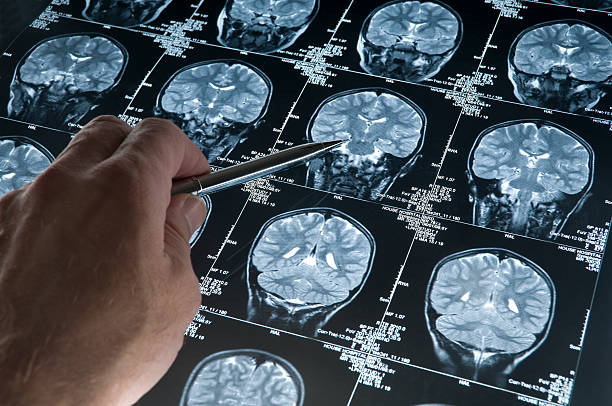

In [2]:
#image1 :
from IPython.display import display ,Image
img1=Image("img3.jpg")
display(img1)

## Simple Introduce :

* This unstructured Data loaded from Kaggle . 

* I used Deep learning Techniques by using tensorflow pkgs .

* I divide Data into train set & validatio set after loading the data.

* I used ImageDataGenerator for preprocessing the Data .

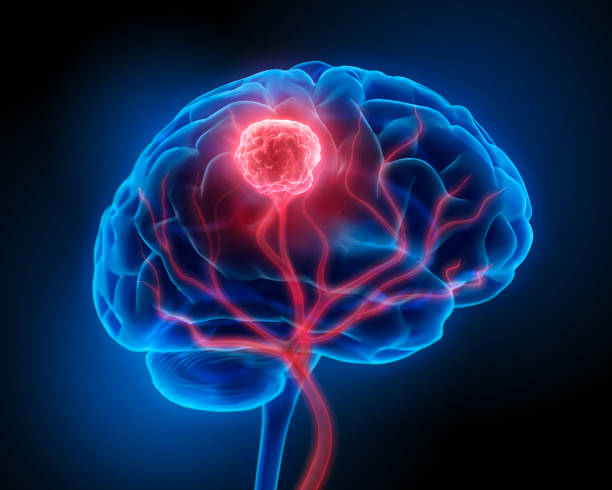

In [3]:
img1=Image("img2.jpg")
display(img1)

## About Dataset: 

* Brain Tumor Detection Dataset

* This dataset contains high-quality MRI images of brain tumors with detailed annotations.

*  The dataset is meticulously curated, cleaned, and annotated to aid in the development and evaluation of machine learning models for brain          tumor detection and classification.

* Classes
   
   - Class 0: Glioma
   
   - Class 1: Meningioma
   
   - Class 2: No Tumor
   
   - Class 3: Pituitary

* Data Split :

* 1 Training Set:

   * Glioma: 1,153 images

   * Meningioma: 1,449 images

   * No Tumor: 711 images

   * Pituitary: 1,424 images

* 2 Validation Set :
   
   * Glioma: 136 images
   
   * Meningioma: 140 images
   
   * No Tumor: 100 images
   
   * Pituitary: 136 images


## imports :

In [4]:
# imports :
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras import models
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow .keras.preprocessing.image import ImageDataGenerator

2024-08-10 17:19:28.530859: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-08-10 17:19:28.532464: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-10 17:19:28.560151: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-10 17:19:28.560767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

2024-08-10 17:19:28.998847: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

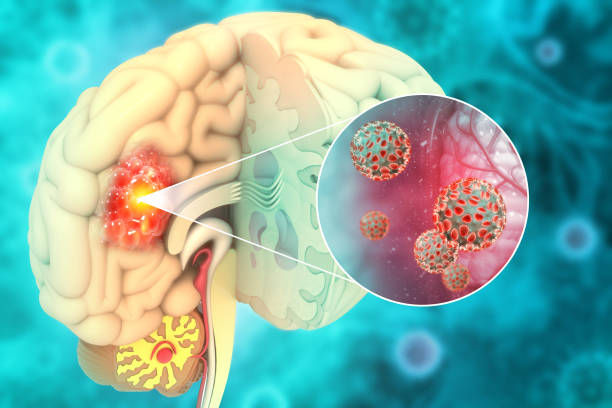

In [5]:
img1=Image("img1.jpg")
display(img1)

## preparing & Loading the Data :

In [5]:
# to unzip the file:
! unzip archive.zip

Archive:  archive.zip

  inflating: Train/Glioma/images/Te-glTr_0000.jpg  

  inflating: Train/Glioma/images/Te-glTr_0005.jpg  

  inflating: Train/Glioma/images/Te-glTr_0007.jpg  

  inflating: Train/Glioma/images/Te-gl_0014.jpg  

  inflating: Train/Glioma/images/Te-gl_0015.jpg  

  inflating: Train/Glioma/images/Te-gl_0016.jpg  

  inflating: Train/Glioma/images/Te-gl_0020.jpg  

  inflating: Train/Glioma/images/Te-gl_0022.jpg  

  inflating: Train/Glioma/images/Te-gl_0023.jpg  

  inflating: Train/Glioma/images/Te-gl_0025.jpg  

  inflating: Train/Glioma/images/Te-gl_0026.jpg  

  inflating: Train/Glioma/images/Te-gl_0027.jpg  

  inflating: Train/Glioma/images/Te-gl_0028.jpg  

  inflating: Train/Glioma/images/Te-gl_0030.jpg  

  inflating: Train/Glioma/images/Te-gl_0032.jpg  

  inflating: Train/Glioma/images/Te-gl_0033.jpg  

  inflating: Train/Glioma/images/Te-gl_0034.jpg  

  inflating: Train/Glioma/images/Te-gl_0035.jpg  

  inflating: Train/Glioma/images/Te-gl_0036.jpg  

  

In [6]:
# Paths to data directories
train_data = 'Train'
val_data = 'Val'

In [7]:
def load_data(data_dir):
    images = []
    labels = []
    classes = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
    
    
    for cl in range(len(classes)):
        dir = os.path.join(data_dir,classes[cl],'images')
        
        for name in os.listdir(dir):
            path = os.path.join(dir,name)
            img = cv2.imread(path)
            img = cv2.resize(img,(261,261))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            images.append(img)
            labels.append(cl)
            
    return np.array(images), np.array(labels)

In [8]:
x_test,y_test=load_data("Val")
x_train,y_train=load_data("Train")
print(f"x_train shape : {x_train.shape} \n y_train shape : {y_train.shape}")
print(f"x_test shape : {x_test.shape} \n y_test shape : {y_test.shape}")

x_train shape : (4737, 261, 261) 

 y_train shape : (4737,)

x_test shape : (512, 261, 261) 

 y_test shape : (512,)


In [9]:
# function that read the image & conver into jpeg:

def get_image_tensor_from_path(image_path,label):
    image=tf.io.read_file(image_path)
    image=tf.image.decode_jpeg(teeimage)
    image=tf.image.convert_image_dtype(image,tf.float32)
    image=tf.image.resize(image,(244,244))

    return image , label

In [10]:
# function to change from brightness or reloation of the image :
def agument(image,label):
    image=tf.image.random_brightness(image,max_delta=32.0/255.0) # change from brightness of image

    image=tf.image.random_flip_left_right(image) # change from position of image

    image=tf.image.random_flip_up_down(image)

    image=tf.image.random_saturation(image,lower=500000,upper=1000000)      # to change preentage of color in image


    return image , lab

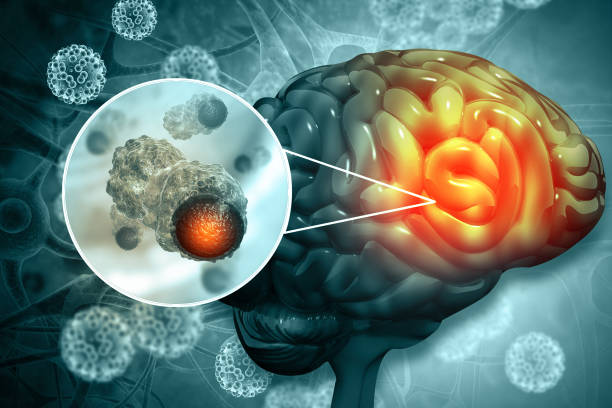

In [11]:
img1=Image("img6.jpg")
display(img1)

## Data Visualization  :

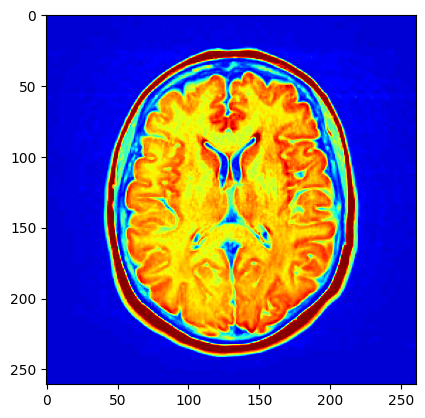

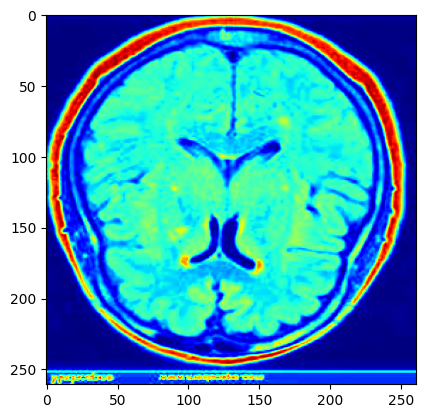

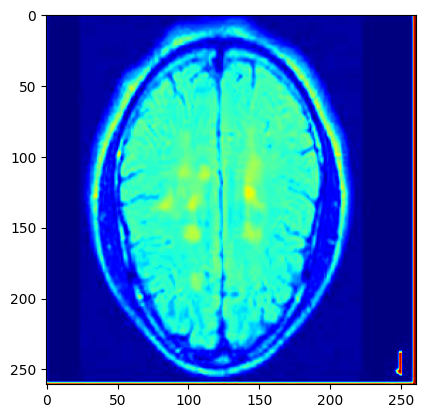

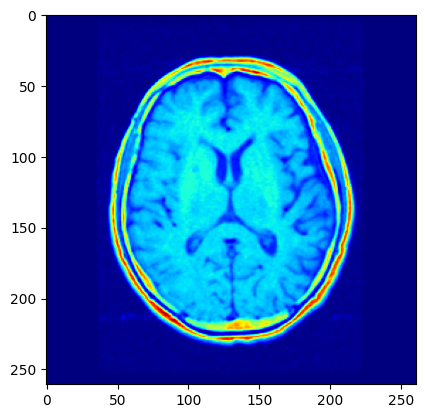

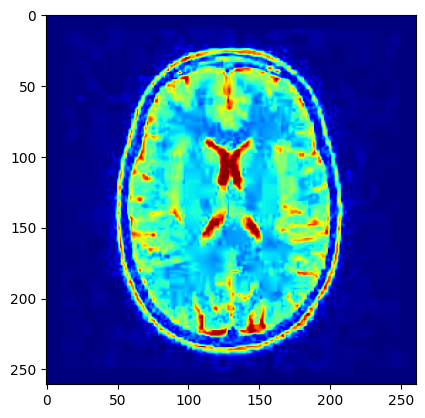

In [16]:
# images with No Tumor :
for index in np.where(y_train == 0)[0][:5]:
    plt.imshow(x_train[index],cmap='jet')
    plt.show()

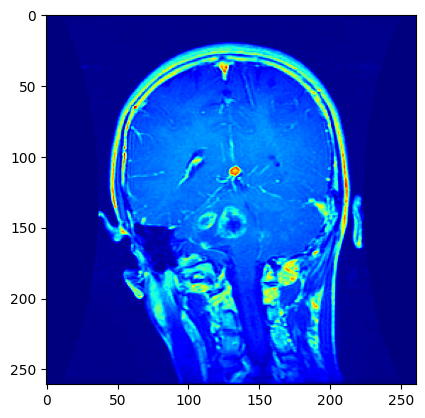

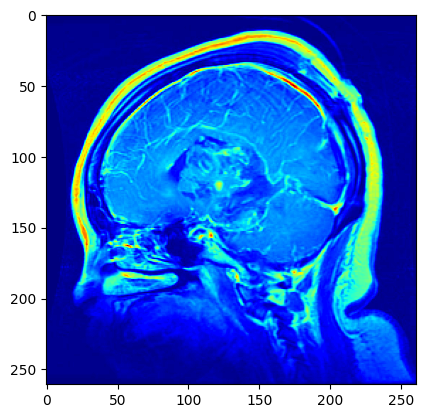

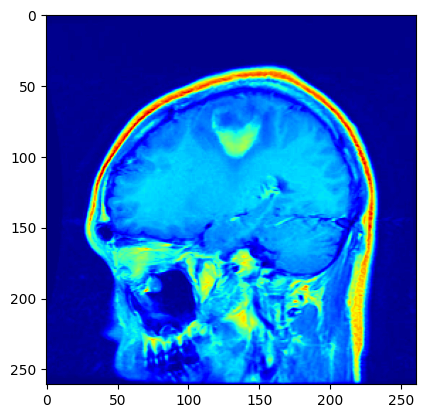

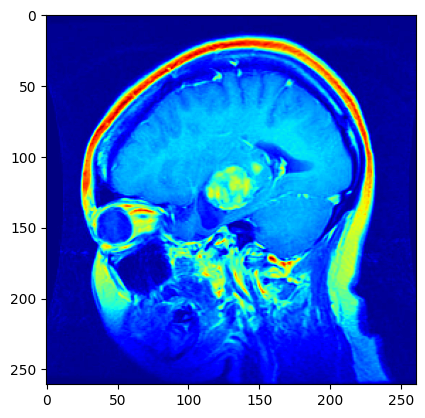

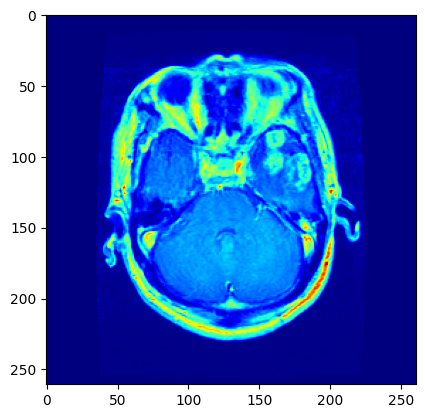

In [15]:
# images with Glioma  :

for index in np.where(y_train == 1)[0][:5]:
    plt.imshow(x_train[index],cmap='jet')
    plt.show()

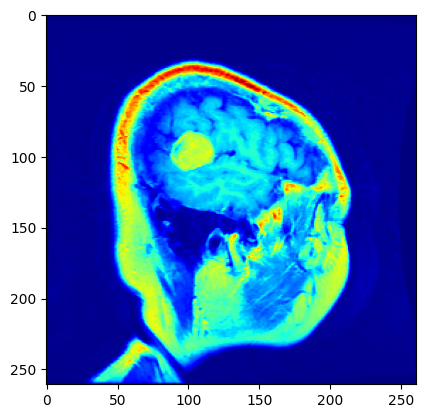

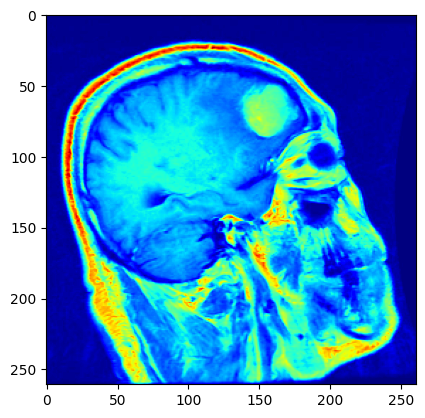

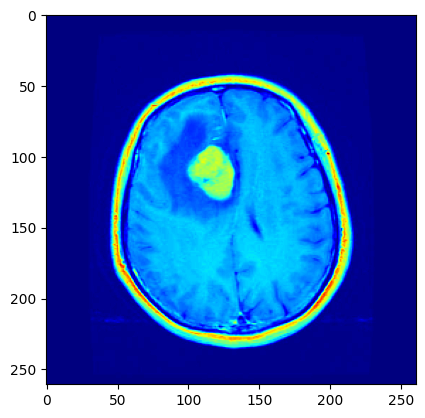

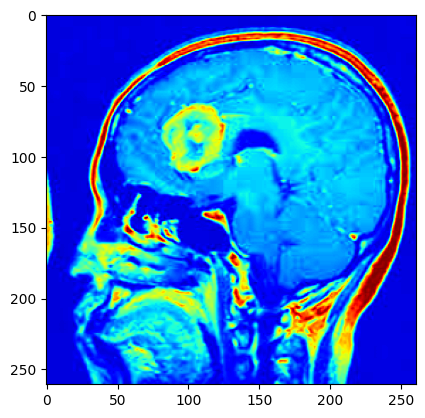

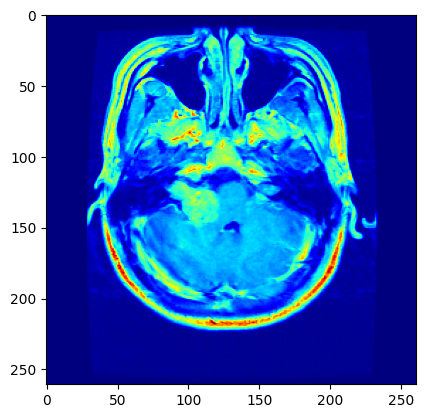

In [14]:
# images with Meningioma  :

for index in np.where(y_train == 2)[0][:5]:
    plt.imshow(x_train[index],cmap='jet')
    plt.show()

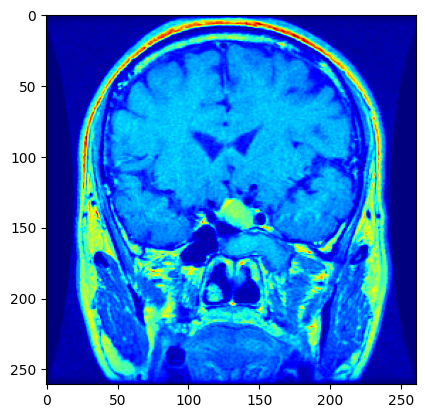

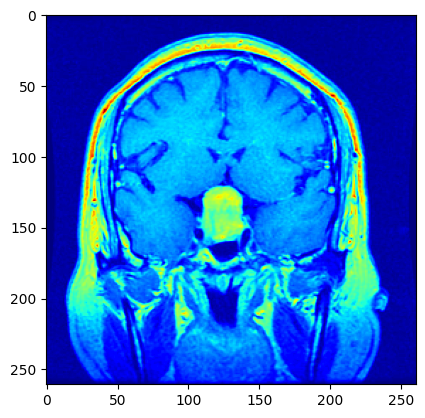

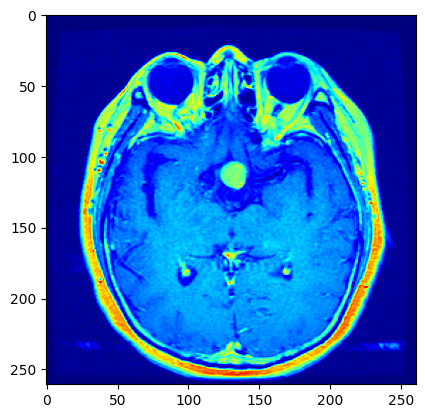

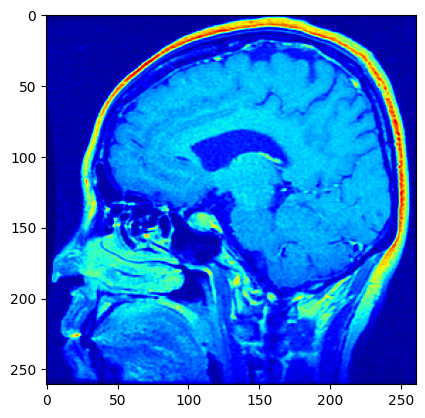

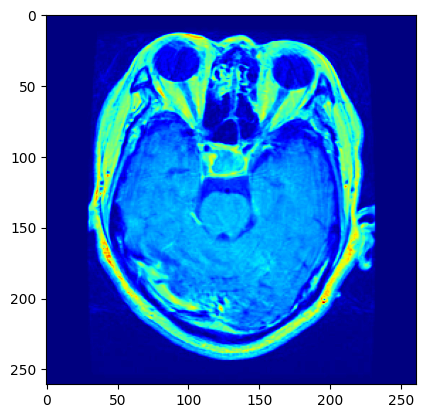

In [17]:
# images with Pituitary  :

for index in np.where(y_train == 3)[0][:5]:
    plt.imshow(x_train[index],cmap='jet')
    plt.show()

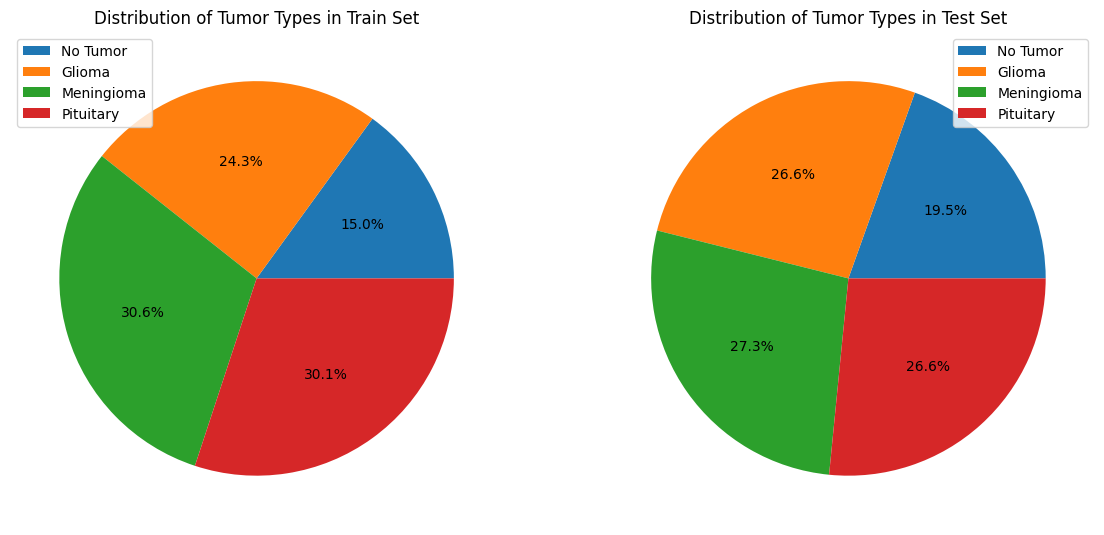

In [18]:
# observation of Types of Tumors :

fig, axes = plt.subplots(1, 2, figsize=(14, 14))

classes = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']

_, counts = np.unique(y_train, return_counts=True)
axes[0].pie(counts, autopct='%1.1f%%')
axes[0].set_title('Distribution of Tumor Types in Train Set')
axes[0].legend(classes)

_, counts = np.unique(y_test, return_counts=True)
axes[1].pie(counts, autopct='%1.1f%%')
axes[1].set_title('Distribution of Tumor Types in Test Set')
axes[1].legend(classes)



## Data  Preprocessing :

In [19]:
# Make Agumention on the train &  valdition data set :
#preprocessing both of train & validation data :

train_data = 'Train'
val_data = 'Val'


train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
            )

train_generator=train_datagen.flow_from_directory(
    train_data,
    target_size=(261,261),
    batch_size=150,
    color_mode='grayscale',
    class_mode="categorical"
)

test_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
            )

val_generator=test_datagen.flow_from_directory(
    val_data,
    target_size=(261,261),
    batch_size=150,
    color_mode='grayscale',
    class_mode="categorical"
)


Found 4737 images belonging to 4 classes.

Found 512 images belonging to 4 classes.


In [20]:
# Define the Callbacks :

class MyCallback(Callback):
    def one_epoch_end(self,epoch,logs={}):
        if(logs.get("accuracy")>0.95):
            print("\n This very well accuract , stop Training")
            self.model.stop_training=True

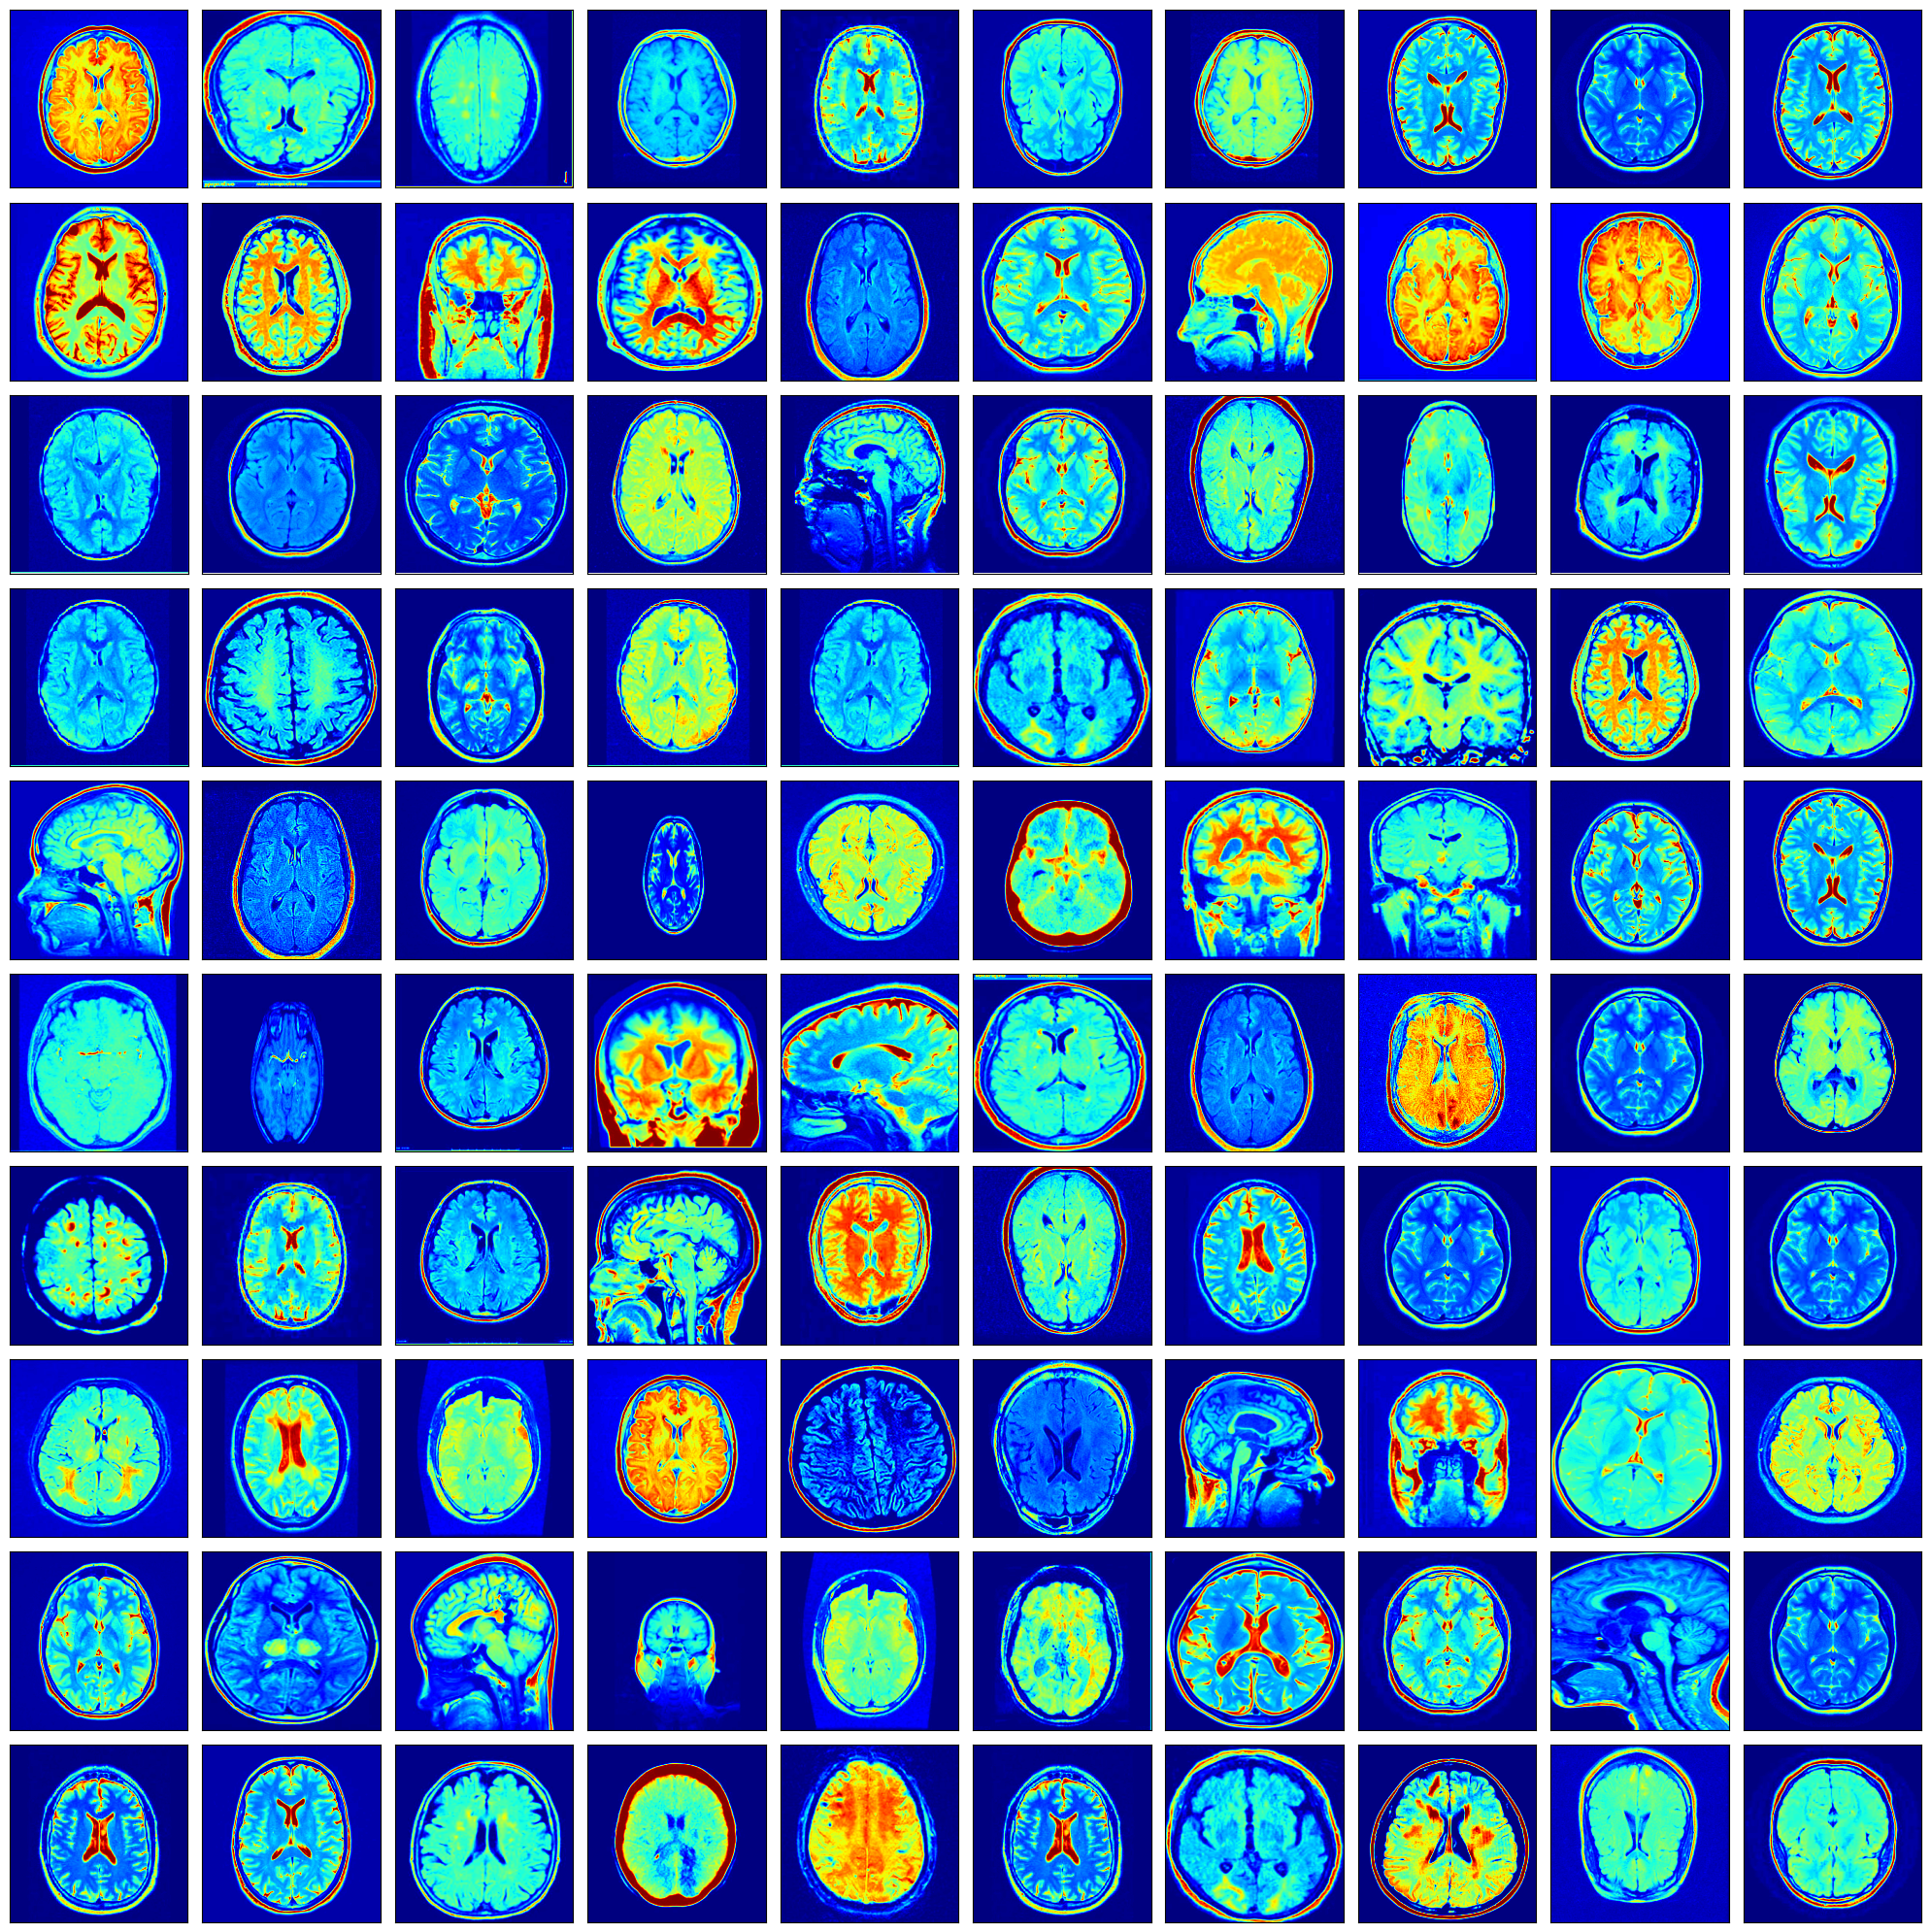

In [24]:
# Display the first 100 images and labels

plt.figure(figsize=(20, 20))  

for i in range(100):
    plt.subplot(10, 10, i + 1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(x_train[i], cmap='jet')   

plt.tight_layout()  
plt.show()

## Bulding Model:

In [25]:
# Bulding the model:

model=Sequential([
    
    Conv2D(16,(3,3),activation="relu",input_shape=(261,261,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(4,activation="softmax")
    
])
model.summary()


 # Make optimizer :

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callback=MyCallback()
# Training model :

print("\n Model Training :")
history=model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    verbose=2,
    callbacks=[callback]
    
               )

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 259, 259, 16)      160       

                                                                 

 max_pooling2d (MaxPooling2  (None, 129, 129, 16)      0         

 D)                                                              

                                                                 

 dropout (Dropout)           (None, 129, 129, 16)      0         

                                                                 

 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      

                                                                 

 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         

 g2D)                                                            

                                                                 

 dropout_1 (Dropout)         (None, 63, 

2024-08-10 17:27:02.829455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

2024-08-10 17:27:02.829910: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.

Skipping registering GPU devices...




 Model Training :

Epoch 1/30

32/32 - 36s - loss: 1.5457 - accuracy: 0.2903 - val_loss: 1.3687 - val_accuracy: 0.2656 - 36s/epoch - 1s/step

Epoch 2/30

32/32 - 38s - loss: 1.3231 - accuracy: 0.3228 - val_loss: 1.2969 - val_accuracy: 0.4082 - 38s/epoch - 1s/step

Epoch 3/30

32/32 - 36s - loss: 1.2257 - accuracy: 0.4233 - val_loss: 1.2469 - val_accuracy: 0.4414 - 36s/epoch - 1s/step

Epoch 4/30

32/32 - 37s - loss: 1.1423 - accuracy: 0.4927 - val_loss: 1.1526 - val_accuracy: 0.4668 - 37s/epoch - 1s/step

Epoch 5/30

32/32 - 36s - loss: 1.1115 - accuracy: 0.5088 - val_loss: 1.1091 - val_accuracy: 0.4824 - 36s/epoch - 1s/step

Epoch 6/30

32/32 - 36s - loss: 1.0690 - accuracy: 0.5311 - val_loss: 1.0383 - val_accuracy: 0.5176 - 36s/epoch - 1s/step

Epoch 7/30

32/32 - 37s - loss: 1.0430 - accuracy: 0.5347 - val_loss: 1.0239 - val_accuracy: 0.5664 - 37s/epoch - 1s/step

Epoch 8/30

32/32 - 37s - loss: 1.0255 - accuracy: 0.5419 - val_loss: 0.9784 - val_accuracy: 0.5859 - 37s/epoch - 1s/s

In [26]:
print("\n Model Prediction :")
y_predict=model.predict(val_generator)
y_predict[:10]



 Model Prediction :

4/4 [==============================] - 2s 472ms/step


array([[0.00121569, 0.11400308, 0.87765056, 0.00713063],
       [0.4399155 , 0.45841768, 0.01445333, 0.08721349],
       [0.44356135, 0.46080598, 0.02783586, 0.06779685],
       [0.28436768, 0.712376  , 0.00201139, 0.00124484],
       [0.5740472 , 0.27181274, 0.01182338, 0.14231676],
       [0.00196531, 0.5131129 , 0.43165302, 0.05326876],
       [0.67871815, 0.13329999, 0.01803826, 0.1699436 ],
       [0.25612992, 0.17595813, 0.03226121, 0.5356507 ],
       [0.3086974 , 0.679823  , 0.00388736, 0.00759219],
       [0.7532148 , 0.22411   , 0.00633394, 0.01634123]], dtype=float32)

In [27]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_predict)} \n the max_value for prediction --->>> {np.max(y_predict)} ")

the min_value for prediction --->> 7.141618546535611e-11 

 the max_value for prediction --->>> 0.9989725351333618 


In [28]:
# Evalute on the test set:

print("\n Model Evaluation :")
test_loss = model.evaluate(val_generator, verbose=2)
print(test_loss)



 Model Evaluation :

4/4 - 2s - loss: 0.7874 - accuracy: 0.6621 - 2s/epoch - 532ms/step

[0.7873632311820984, 0.662109375]


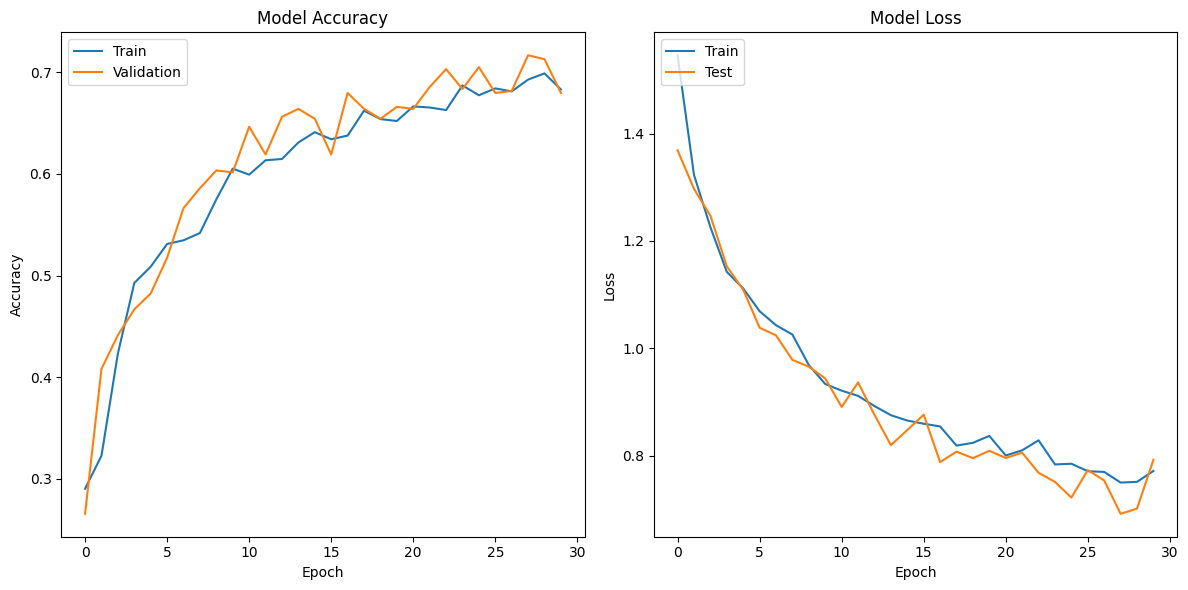

In [29]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Save & Load the model :

In [30]:
# Save the model
model.save('brain_tumor_model.h5')

# Load the trained model
model = tf.keras.models.load_model('brain_tumor_model.h5')

/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


## End project 

* Devloper : AbdalRahman Gameel Ahmed Hebishy

* if you find my Notebook useful upvote me & Leave a comment if you have any Question

* Kaggle works : https://www.kaggle.com/work
   